<a href="https://colab.research.google.com/github/cindylrs04/PCVK25_3F_06/blob/main/Week5_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cindy Laili Larasati - 06

# PERCOBAAN PRAKTIKUM

D-1 Percobaan Histogram

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

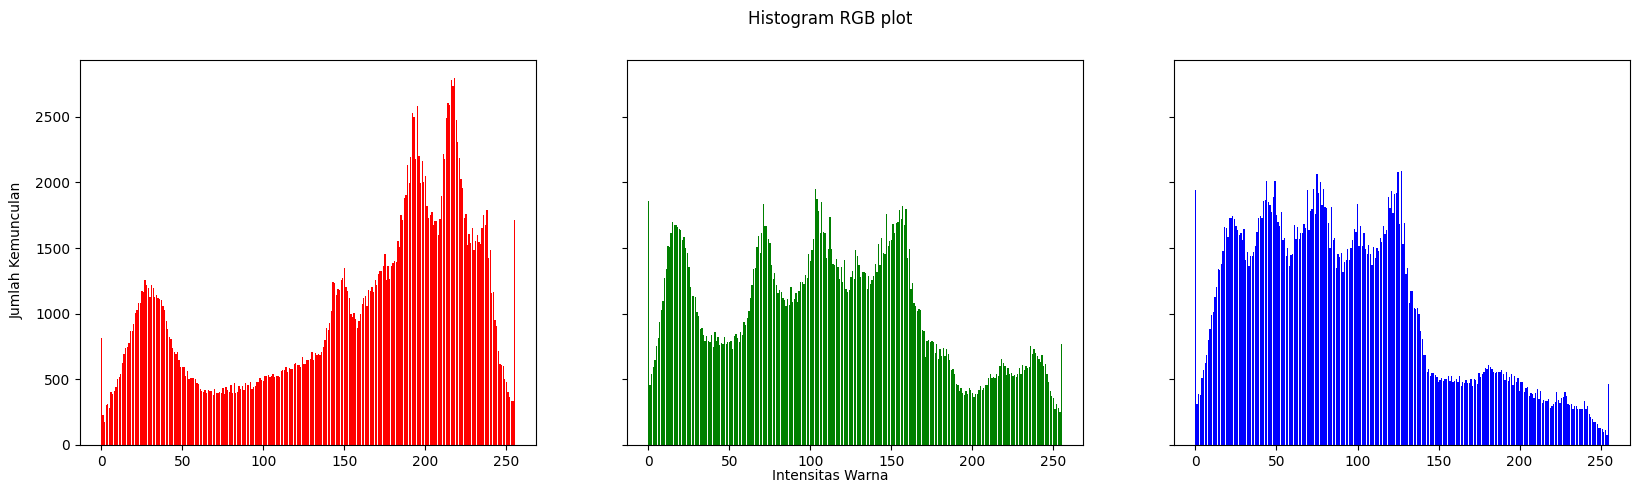

In [4]:
#1 Membuat histogram image (manual)
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height) :
  for x in range(0,width) :
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

PERTANYAAN PRAKTIKUM D1

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

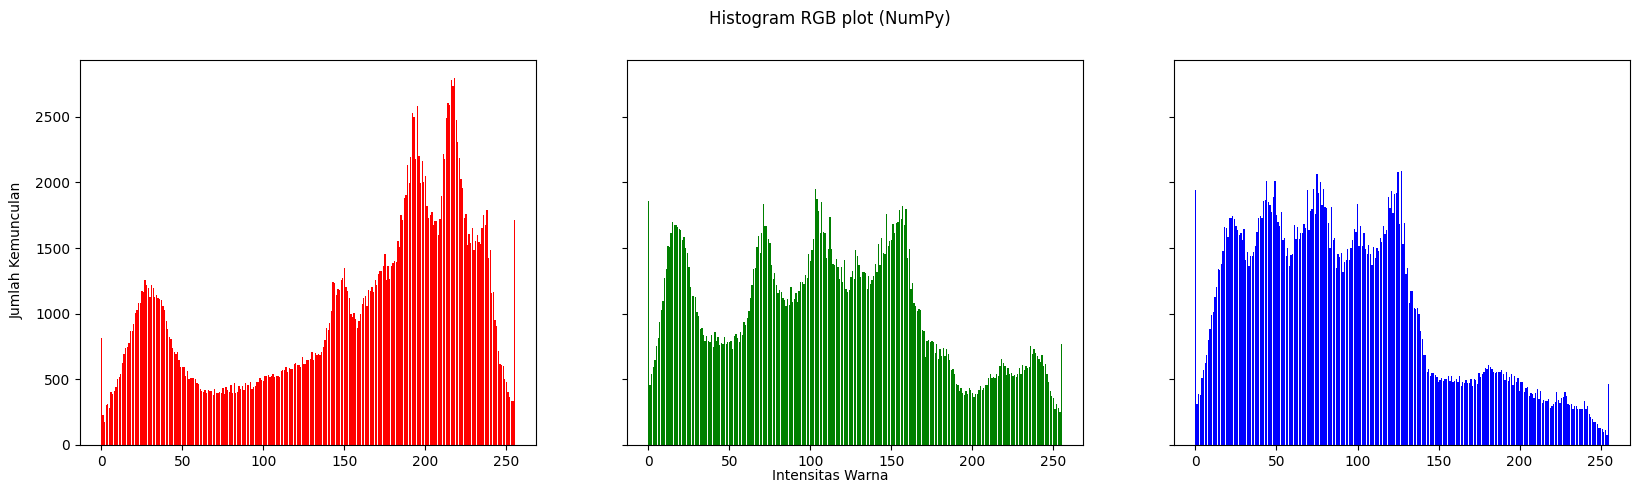

In [6]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

red_channel = img[:, :, 0].flatten()
green_channel = img[:, :, 1].flatten()
blue_channel = img[:, :, 2].flatten()

# Hitung histogram menggunakan NumPy
red_hist, _ = np.histogram(red_channel, bins=256, range=(0,256))
green_hist, _ = np.histogram(green_channel, bins=256, range=(0,256))
blue_hist, _ = np.histogram(blue_channel, bins=256, range=(0,256))

names = np.arange(256)

fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot (NumPy)')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(names, red_hist, color='red')
axs[1].bar(names, green_hist, color='green')
axs[2].bar(names, blue_hist, color='blue')

plt.show()

Output sama, karena sama-sama menghitung jumlah piksel pada setiap tingkat intensitas warna. Perbedaannya hanya pada metode perhitungan: cara manual membutuhkan waktu lebih lama, sedangkan NumPy mampu melakukannya lebih cepat.

2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

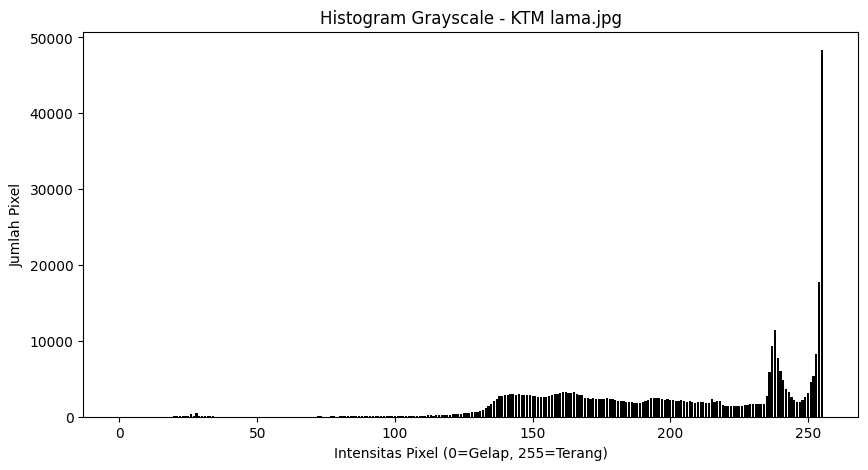

In [14]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/KTM lama.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Hitung histogram
hist, bins = np.histogram(gray.flatten(), bins=256, range=(0,256))

plt.figure(figsize=(10,5))
plt.title("Histogram Grayscale - KTM lama.jpg")
plt.xlabel("Intensitas Pixel (0=Gelap, 255=Terang)")
plt.ylabel("Jumlah Pixel")
plt.bar(np.arange(256), hist, color='black')
plt.show()

Gambar terlihat lebih cenderung terang karena sebagian besar piksel punya nilai intensitas tinggi. Tapi, sebaran intensitasnya tidak merata dan banyak menumpuk di sisi kanan, sehingga gambar bisa jadi punya kontras rendah di bagian terang